In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
# Sample corpus
documents = ['Machine learning is the study of computer algorithms that improve automatically through experience.\
Machine learning algorithms build a mathematical model based on sample data, known as training data.\
The discipline of machine learning employs various approaches to teach computers to accomplish tasks \
where no fully satisfactory algorithm is available.',
'Machine learning is closely related to computational statistics, which focuses on making predictions using computers.\
The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.',
'Machine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so. \
It involves computers learning from data provided so that they carry out certain tasks.',
'Machine learning approaches are traditionally divided into three broad categories, depending on the nature of the "signal"\
or "feedback" available to the learning system: Supervised, Unsupervised and Reinforcement',
'Software engineering is the systematic application of engineering approaches to the development of software.\
Software engineering is a computing discipline.',
'A software engineer creates programs based on logic for the computer to execute. A software engineer has to be more concerned\
about the correctness of the program in all the cases. Meanwhile, a data scientist is comfortable with uncertainty and variability.'
]

In [ ]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', 0)

In [ ]:
documents_df=pd.DataFrame(documents,columns=['documents'])

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Corpus Dataframe

In [ ]:
documents_df

,documents
0,"Machine learning is the study of computer algorithms that improve automatically through experience.Machine learning algorithms build a mathematical model based on sample data, known as training data.The discipline of machine learning employs various approaches to teach computers to accomplish tasks where no fully satisfactory algorithm is available."
1,"Machine learning is closely related to computational statistics, which focuses on making predictions using computers.The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning."
2,Machine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so. It involves computers learning from data provided so that they carry out certain tasks.
3,"Machine learning approaches are traditionally divided into three broad categories, depending on the nature of the ""signal""or ""feedback"" available to the learning system: Supervised, Unsupervised and Reinforcement"
4,Software engineering is the systematic application of engineering approaches to the development of software.Software engineering is a computing discipline.
5,"A software engineer creates programs based on logic for the computer to execute. A software engineer has to be more concernedabout the correctness of the program in all the cases. Meanwhile, a data scientist is comfortable with uncertainty and variability."


In [ ]:
# removing special characters and stop words from the text
stop_words_l=stopwords.words('english')
documents_df['documents_cleaned']=documents_df.documents.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split() if re.sub(r'[^a-zA-Z]',' ',w).lower() not in stop_words_l) )


#### Tf-idf vectors

In [ ]:
tfidfvectoriser=TfidfVectorizer(max_features=64)
tfidfvectoriser.fit(documents_df.documents_cleaned)
tfidf_vectors=tfidfvectoriser.transform(documents_df.documents_cleaned)

In [ ]:
tfidf_vectors.shape

(6, 64)

In [ ]:
# Every vector is already normalised to have unit L2 norm
np.linalg.norm(tfidf_vectors[0],ord=2)

ValueError: ignored

In [ ]:
tfidf_vectors=tfidf_vectors.toarray()
print (tfidf_vectors)

[[0.19392675 0.38785349 0.         0.1342579  0.15902271 0.15902271
  0.         0.19392675 0.         0.         0.         0.
  0.         0.         0.15902271 0.1342579  0.         0.
  0.         0.         0.26851579 0.15902271 0.         0.
  0.         0.19392675 0.34514645 0.34514645 0.15902271 0.
  0.19392675 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.19392675 0.19392675 0.         0.         0.         0.
  0.         0.15902271 0.         0.         0.         0.15902271
  0.19392675 0.15902271 0.         0.         0.         0.19392675
  0.         0.         0.         0.        ]
 [0.         0.         0.21927835 0.         0.         0.
  0.         0.         0.         0.         0.         0.26740796
  0.         0.26740796 0.         0.18512985 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.31728443 0.31728443 0.21927835 0.
  0.         0.      

In [ ]:
#tfidf_vectors=tfidf_vectors.toarray()
print (tfidf_vectors[0])
print(tfidf_vectors.shape)

[0.19392675 0.38785349 0.         0.1342579  0.15902271 0.15902271
 0.         0.19392675 0.         0.         0.         0.
 0.         0.         0.15902271 0.1342579  0.         0.
 0.         0.         0.26851579 0.15902271 0.         0.
 0.         0.19392675 0.34514645 0.34514645 0.15902271 0.
 0.19392675 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.19392675 0.19392675 0.         0.         0.         0.
 0.         0.15902271 0.         0.         0.         0.15902271
 0.19392675 0.15902271 0.         0.         0.         0.19392675
 0.         0.         0.         0.        ]
(6, 64)


##### Every document has been converted into a 64 dimensional vector. As we set the max_features=64

### Pairwise similarity

##### Pairwise cosine similarity would just be the dot product of the vectors becasue tf-idf vectors from sklearn are already normalized and L2 norm of these vectors is 1. So denominator of cosine similiarity formula is 1 in this case.

In [ ]:
pairwise_similarities_1=np.dot(tfidf_vectors,tfidf_vectors.T)
pairwise_differences_1=euclidean_distances(tfidf_vectors)

In [ ]:
print (tfidf_vectors[0])
print (pairwise_similarities_1.shape)
print(pairwise_similarities_1)
print (pairwise_similarities_1[0][:])

[0.19392675 0.38785349 0.         0.1342579  0.15902271 0.15902271
 0.         0.19392675 0.         0.         0.         0.
 0.         0.         0.15902271 0.1342579  0.         0.
 0.         0.         0.26851579 0.15902271 0.         0.
 0.         0.19392675 0.34514645 0.34514645 0.15902271 0.
 0.19392675 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.19392675 0.19392675 0.         0.         0.         0.
 0.         0.15902271 0.         0.         0.         0.15902271
 0.19392675 0.15902271 0.         0.         0.         0.19392675
 0.         0.         0.         0.        ]
(6, 6)
[[1.         0.34848505 0.30379215 0.23311246 0.05140793 0.10112144]
 [0.34848505 1.         0.20003764 0.15715423 0.04138688 0.        ]
 [0.30379215 0.20003764 1.         0.11932258 0.         0.02643535]
 [0.23311246 0.15715423 0.11932258 1.         0.03070163 0.        ]
 [0.05140793 0.04138688 0.         0.03070163 1.         

In [ ]:
from sklearn.preprocessing import normalize
print(pairwise_differences_1)
normed_matrix_1 = normalize(pairwise_differences_1, axis=1, norm='l1')
print(normed_matrix_1)

[[0.         1.14150335 1.18000665 1.23845674 1.37738307 1.34080465]
 [1.14150335 0.         1.2648813  1.29834184 1.38463939 1.41421356]
 [1.18000665 1.2648813  0.         1.32716044 1.41421356 1.39539575]
 [1.23845674 1.29834184 1.32716044 0.         1.392335   1.41421356]
 [1.37738307 1.38463939 1.41421356 1.392335   0.         1.25680768]
 [1.34080465 1.41421356 1.39539575 1.41421356 1.25680768 0.        ]]
[[0.         0.18182148 0.18795438 0.19726446 0.21939299 0.21356669]
 [0.17551924 0.         0.19449002 0.19963496 0.2129042  0.21745157]
 [0.17928715 0.19218278 0.         0.20164531 0.21487194 0.21201281]
 [0.18566154 0.19463914 0.19895944 0.         0.20872999 0.21200989]
 [0.20180317 0.20286631 0.20719928 0.20399381 0.         0.18413743]
 [0.19655756 0.20731906 0.20456043 0.20731906 0.18424388 0.        ]]


In [ ]:
import matplotlib.pyplot as plt
def plot(dist1,dist2,figname):
  plt.rcParams["figure.figsize"] = 15, 5
  main_title = ['Cosine Similarity','Euclidean Distance']
  fig, ax = plt.subplots(ncols=2)
  for i in range(0,2):
    if i==0:
      ax[i] = sns.heatmap(dist1, cmap="YlGnBu")
      #ax[i].set_ylabel('Count')
    elif i==1:
      ax[i] = sns.heatmap(dist2, cmap="YlGnBu")
    ax[i].set_title('{}'.format(main_title[i]))
      #ax[i].set_xticks(x)
      #ax[i].set_xticklabels(labels)
      #ax.legend()
    #ax[i].legend(loc="center")
    # for i in range(0,len(final_count_ranges)):
    # rects = ax.bar(x+z[i],final_count_ranges[i],0.3,label=i)
    # ax.bar_label(rects, padding=1)
    #   axes[i].set_title(title[i])
    #   axes[i].plot([1,2,3],[2,3,1], "b-", label="blue")
    #   axes[i].plot([1,2,3],[1,2,1], "r-", label="red")
    #   axes[i].legend(loc="center", bbox_to_anchor=(0.6,0.5))
    #   axes[i].scatter((0.6),(0.5), s=81, c="limegreen", transform=ax.transAxes)

  #plt.tight_layout()
  plt.savefig('{}.svg'.format(figname))    
  plt.show()

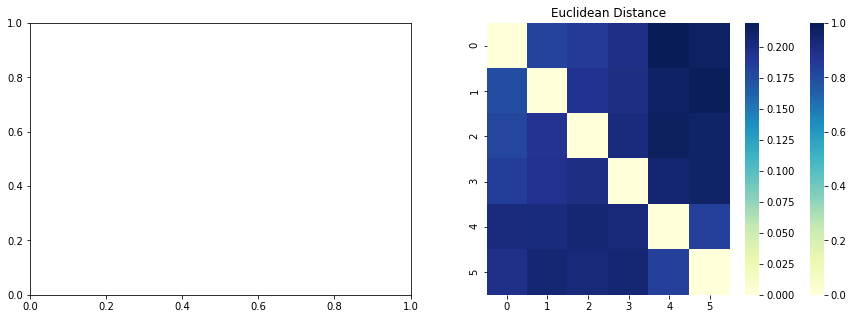

In [ ]:
plot(pairwise_similarities_1,normed_matrix_1,1)

In [ ]:
import matplotlib.pyplot as plt

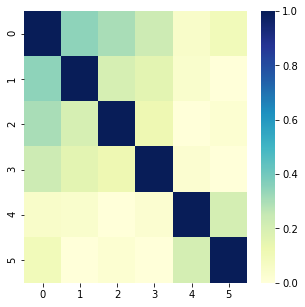

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5)) 
ax_blue = sns.heatmap(pairwise_similarities_1, cmap="YlGnBu")

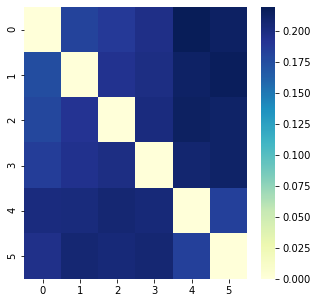

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5)) 
ax_blue = sns.heatmap(normed_matrix_1, cmap="YlGnBu")

##### similarity is highest, 1 at index 0 becasue they are the same documents

In [ ]:
def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {documents_df.iloc[doc_id]["documents"]}')
    print ('\n')
    print (f'Similar Documents using {matrix}:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {documents_df.iloc[ix]["documents"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')

In [ ]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: Machine learning is the study of computer algorithms that improve automatically through experience.Machine learning algorithms build a mathematical model based on sample data, known as training data.The discipline of machine learning employs various approaches to teach computers to accomplish tasks where no fully satisfactory algorithm is available.


Similar Documents using Cosine Similarity:


Document: Machine learning is closely related to computational statistics, which focuses on making predictions using computers.The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Cosine Similarity : 0.34848504631157373


Document: Machine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so. It involves computers learning from data provided so that they carry out certain tasks.
Cosine Similarity : 0.3037921506235846


Document: Machine learning approaches ar

In [ ]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Document: Machine learning is the study of computer algorithms that improve automatically through experience.Machine learning algorithms build a mathematical model based on sample data, known as training data.The discipline of machine learning employs various approaches to teach computers to accomplish tasks where no fully satisfactory algorithm is available.


Similar Documents using Euclidean Distance:


Document: Machine learning is closely related to computational statistics, which focuses on making predictions using computers.The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Euclidean Distance : 1.1415033540804216


Document: Machine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so. It involves computers learning from data provided so that they carry out certain tasks.
Euclidean Distance : 1.1800066519951617


Document: Machine learning approaches 

#### word2vec embeddings

In [ ]:
from keras.preprocessing.text import Tokenizer
import gensim
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# tokenize and pad every document to make them of the same size
tokenizer=Tokenizer()
tokenizer.fit_on_texts(documents_df.documents_cleaned)
tokenized_documents=tokenizer.texts_to_sequences(documents_df.documents_cleaned)
tokenized_paded_documents=pad_sequences(tokenized_documents,maxlen=64,padding='post')
vocab_size=len(tokenizer.word_index)+1

print (tokenized_paded_documents[0])

[ 2  1  9 10 11 20 21 22  2  1 11 23 12 24 13 25  4 26 27  4 14 15  2  1
 28 29  6 30  5 31  7 32 33 34 16  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [ ]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-04-25 14:31:54--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.114.100
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.114.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  91.2MB/s    in 17s     

2021-04-25 14:32:11 (93.4 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
!ls

GoogleNews-vectors-negative300.bin.gz  sample_data


In [ ]:
# loading pre-trained embeddings, each word is represented as a 300 dimensional vector

# rom gensim import models
from gensim import models

model_w2v = models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)
#model_w2v = gensim.models.KeyedVectors.load_word2vec_format(W2V_PATH, binary=True)

In [ ]:
# creating embedding matrix, every row is a vector representation from the vocabulary indexed by the tokenizer index. 
embedding_matrix=np.zeros((vocab_size,300))
for word,i in tokenizer.word_index.items():
    if word in model_w2v:
        embedding_matrix[i]=model_w2v[word]

In [ ]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
embedding_matrix[tokenizer.word_index['machine']]

array([ 2.55859375e-01, -2.20947266e-02,  2.90527344e-02,  5.44433594e-02,
       -7.42187500e-02,  3.53515625e-01, -6.34765625e-02,  1.44531250e-01,
        7.22656250e-02,  1.00097656e-01, -1.82617188e-01, -2.28515625e-01,
        2.20947266e-02, -2.20703125e-01,  1.91406250e-01,  1.91406250e-01,
       -1.66992188e-01,  1.67968750e-01,  2.94921875e-01, -1.80664062e-01,
       -1.45263672e-02,  1.07421875e-01, -1.65039062e-01,  2.98828125e-01,
        1.29882812e-01, -1.17187500e-01, -1.67968750e-01,  1.01562500e-01,
        4.49218750e-02, -1.20605469e-01,  7.47070312e-02, -3.47656250e-01,
       -1.01074219e-01,  3.80859375e-01, -2.06054688e-01, -7.47070312e-02,
       -1.08398438e-01,  1.86523438e-01,  2.01171875e-01, -2.12402344e-02,
        2.85156250e-01, -9.27734375e-02,  1.39648438e-01,  5.78613281e-02,
        2.67578125e-01, -1.50390625e-01, -8.54492188e-02,  1.92382812e-01,
        8.00781250e-02,  6.39648438e-02, -7.47070312e-02, -8.59375000e-02,
        5.10253906e-02, -

In [ ]:
# creating document-word embeddings
document_word_embeddings=np.zeros((len(tokenized_paded_documents),64,300))

for i in range(len(tokenized_paded_documents)):
    for j in range(len(tokenized_paded_documents[0])):
        document_word_embeddings[i][j]=embedding_matrix[tokenized_paded_documents[i][j]]

In [ ]:
document_word_embeddings.shape

(6, 64, 300)

In [ ]:
# tf-idf vectors do not keep the original sequence of words, converting them into actual word sequences from the documents

document_embeddings=np.zeros((len(tokenized_paded_documents),300))
words=tfidfvectoriser.get_feature_names()

for i in range(len(document_word_embeddings)):
    for j in range(len(words)):
        document_embeddings[i]+=embedding_matrix[tokenizer.word_index[words[j]]]*tfidf_vectors[i][j]
        
document_embeddings=document_embeddings/np.sum(tfidf_vectors,axis=1).reshape(-1,1)
    

In [ ]:
pairwise_similarities_2=cosine_similarity(document_embeddings)
pairwise_differences_2=euclidean_distances(document_embeddings)
normed_matrix_2 = normalize(pairwise_differences_2, axis=1, norm='l1')

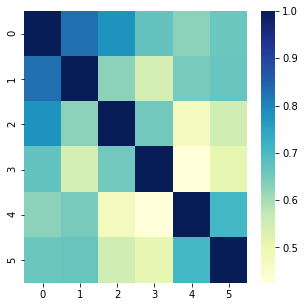

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5)) 
ax_blue = sns.heatmap(pairwise_similarities_2, cmap="YlGnBu")

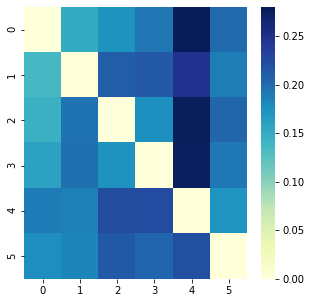

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5)) 
ax_blue = sns.heatmap(normed_matrix_2, cmap="YlGnBu")

In [ ]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: Machine learning is the study of computer algorithms that improve automatically through experience.Machine learning algorithms build a mathematical model based on sample data, known as training data.The discipline of machine learning employs various approaches to teach computers to accomplish tasks where no fully satisfactory algorithm is available.


Similar Documents using Cosine Similarity:


Document: Machine learning is closely related to computational statistics, which focuses on making predictions using computers.The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Cosine Similarity : 0.8302158037549516


Document: Machine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so. It involves computers learning from data provided so that they carry out certain tasks.
Cosine Similarity : 0.779994095766225


Document: Machine learning approaches are 

In [ ]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Document: Machine learning is the study of computer algorithms that improve automatically through experience.Machine learning algorithms build a mathematical model based on sample data, known as training data.The discipline of machine learning employs various approaches to teach computers to accomplish tasks where no fully satisfactory algorithm is available.


Similar Documents using Euclidean Distance:


Document: Machine learning is closely related to computational statistics, which focuses on making predictions using computers.The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Euclidean Distance : 0.7135816494552345


Document: Machine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so. It involves computers learning from data provided so that they carry out certain tasks.
Euclidean Distance : 0.8160565965230125


Document: Machine learning approaches 

#### Glove embeddings

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading Glove word embeddings into a dictionary with "word" as key and values as word vectors

embeddings_index = dict()

with open('/content/drive/MyDrive/SF_LAB_2/Document_Similarity/glove.6B.50d.txt') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    

In [ ]:
# creating embedding matrix, every row is a vector representation from the vocabulary indexed by the tokenizer index. 

embedding_matrix=np.zeros((vocab_size,50))

for word,i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
# tf-idf vectors do not keep the original sequence of words, converting them into actual word sequences from the documents

document_embeddings=np.zeros((len(tokenized_paded_documents),50))
words=tfidfvectoriser.get_feature_names()

for i in range(documents_df.shape[0]):
    for j in range(len(words)):
        document_embeddings[i]+=embedding_matrix[tokenizer.word_index[words[j]]]*tfidf_vectors[i][j]
        
document_embeddings=document_embeddings/np.sum(tfidf_vectors,axis=1).reshape(-1,1)

In [ ]:
document_embeddings.shape

(6, 50)

In [ ]:
pairwise_similarities_3=cosine_similarity(document_embeddings)
pairwise_differences_3=euclidean_distances(document_embeddings)
normed_matrix_3 = normalize(pairwise_differences_3, axis=1, norm='l1')

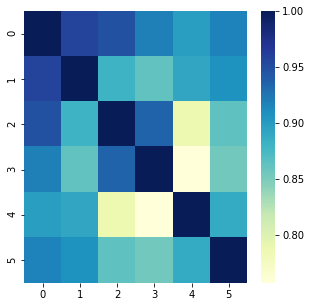

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5)) 
ax_blue = sns.heatmap(pairwise_similarities_3, cmap="YlGnBu")

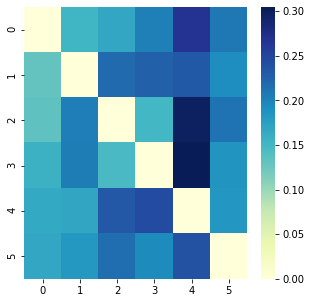

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5)) 
ax_blue = sns.heatmap(normed_matrix_3, cmap="YlGnBu")

In [ ]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: Machine learning is the study of computer algorithms that improve automatically through experience.Machine learning algorithms build a mathematical model based on sample data, known as training data.The discipline of machine learning employs various approaches to teach computers to accomplish tasks where no fully satisfactory algorithm is available.


Similar Documents using Cosine Similarity:


Document: Machine learning is closely related to computational statistics, which focuses on making predictions using computers.The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Cosine Similarity : 0.9573438866159906


Document: Machine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so. It involves computers learning from data provided so that they carry out certain tasks.
Cosine Similarity : 0.9478336924411906


Document: Machine learning approaches are

In [ ]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Document: Machine learning is the study of computer algorithms that improve automatically through experience.Machine learning algorithms build a mathematical model based on sample data, known as training data.The discipline of machine learning employs various approaches to teach computers to accomplish tasks where no fully satisfactory algorithm is available.


Similar Documents using Euclidean Distance:


Document: Machine learning is closely related to computational statistics, which focuses on making predictions using computers.The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Euclidean Distance : 1.0873376708634734


Document: Machine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so. It involves computers learning from data provided so that they carry out certain tasks.
Euclidean Distance : 1.2053156472759021


Document: Machine learning approaches 

#### Doc2vec model

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(documents_df.documents_cleaned)]

In [ ]:
model_d2v = Doc2Vec(vector_size=100,alpha=0.025, min_count=1)
  
model_d2v.build_vocab(tagged_data)

for epoch in range(100):
    model_d2v.train(tagged_data,
                total_examples=model_d2v.corpus_count,
                epochs=model_d2v.epochs)

In [ ]:
document_embeddings=np.zeros((documents_df.shape[0],100))

for i in range(len(document_embeddings)):
    document_embeddings[i]=model_d2v.docvecs[i]

In [ ]:
pairwise_similarities_4=cosine_similarity(document_embeddings)
pairwise_differences_4=euclidean_distances(document_embeddings)
normed_matrix_4 = normalize(pairwise_differences_4, axis=1, norm='l1')

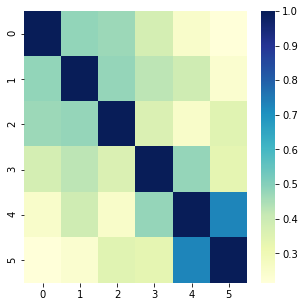

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5)) 
ax_blue = sns.heatmap(pairwise_similarities_4, cmap="YlGnBu")

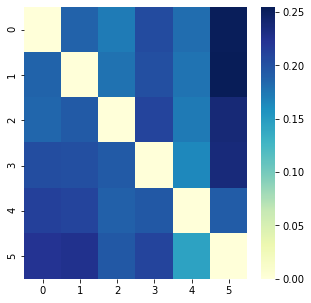

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5)) 
ax_blue = sns.heatmap(normed_matrix_4, cmap="YlGnBu")

In [ ]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: Machine learning is the study of computer algorithms that improve automatically through experience.Machine learning algorithms build a mathematical model based on sample data, known as training data.The discipline of machine learning employs various approaches to teach computers to accomplish tasks where no fully satisfactory algorithm is available.


Similar Documents using Cosine Similarity:


Document: Machine learning is closely related to computational statistics, which focuses on making predictions using computers.The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Cosine Similarity : 0.4838936712512902


Document: Machine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so. It involves computers learning from data provided so that they carry out certain tasks.
Cosine Similarity : 0.47049866361302317


Document: Machine learning approaches ar

In [ ]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Document: Machine learning is the study of computer algorithms that improve automatically through experience.Machine learning algorithms build a mathematical model based on sample data, known as training data.The discipline of machine learning employs various approaches to teach computers to accomplish tasks where no fully satisfactory algorithm is available.


Similar Documents using Euclidean Distance:


Document: Machine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so. It involves computers learning from data provided so that they carry out certain tasks.
Euclidean Distance : 5.903977415186227


Document: Software engineering is the systematic application of engineering approaches to the development of software.Software engineering is a computing discipline.
Euclidean Distance : 6.218595423026552


Document: Machine learning is closely related to computational statistics, which focuses on making predictions using comput

#### BERT model

In [ ]:
documents_df['documents_cleaned']

0    machine learning study computer algorithms improve automatically experience machine learning algorithms build mathematical model based sample data  known training data the discipline machine learning employs various approaches teach computers accomplish tasks fully satisfactory algorithm available 
1    machine learning closely related computational statistics  focuses making predictions using computers the study mathematical optimization delivers methods  theory application domains field machine learning                                                                                              
2    machine learning involves computers discovering perform tasks without explicitly programmed so  involves computers learning data provided carry certain tasks                                                                                                                                              
3    machine learning approaches traditionally divided three broad categories  depend

In [ ]:
!pip install sentence-transformers

     |████████████████████████████████| 81kB 3.6MB/s 
     |████████████████████████████████| 2.1MB 9.0MB/s 
     |████████████████████████████████| 1.2MB 20.9MB/s 
     |████████████████████████████████| 3.3MB 43.2MB/s 
     |████████████████████████████████| 901kB 45.6MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.1.0-cp37-none-any.whl size=119615 sha256=e4a50b2eda2933ba63ec6d0a8ca38c6828d321231a7fb1e05265a127f85aade8
  Stored in directory: /root/.cache/pip/wheels/84/cb/21/1066bff3027215c760ca14a198f698bca8fccb92e33e2327eb
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
#documents_df['documents_cleaned'][4] = "The stage is set for an epic clash as Chennai Super Kings led by MS Dhoni face off against the undefeated army of Virat Kohli's Royal Challengers Bangalore. Both teams are at the top of their games at the moment, and tonight's contest will be the real battle of will and determination. Kohli's RCB will look to cement their top spot with another win in the bag. Dhoni's army will be eager to climb up the ranks and defeated the undefeated"
documents_df['documents_cleaned'][4] = 'Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.\
Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment.'

In [ ]:
document_embeddings = sbert_model.encode(documents_df['documents_cleaned'])

In [ ]:
documents_df['documents_cleaned']

0    machine learning study computer algorithms improve automatically experience machine learning algorithms build mathematical model based sample data  known training data the discipline machine learning employs various approaches teach computers accomplish tasks fully satisfactory algorithm available 
1    machine learning closely related computational statistics  focuses making predictions using computers the study mathematical optimization delivers methods  theory application domains field machine learning                                                                                              
2    machine learning involves computers discovering perform tasks without explicitly programmed so  involves computers learning data provided carry certain tasks                                                                                                                                              
3    machine learning approaches traditionally divided three broad categories  depend

In [ ]:
documents_df['documents']

0    Machine learning is the study of computer algorithms that improve automatically through experience.Machine learning algorithms build a mathematical model based on sample data, known as training data.The discipline of machine learning employs various approaches to teach computers to accomplish tasks where no fully satisfactory algorithm is available.
1    Machine learning is closely related to computational statistics, which focuses on making predictions using computers.The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.                                                                                                                 
2    Machine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so. It involves computers learning from data provided so that they carry out certain tasks.                                                                         

In [ ]:
pairwise_similarities_5=cosine_similarity(document_embeddings)
pairwise_differences_5=euclidean_distances(document_embeddings)
normed_matrix_5 = normalize(pairwise_differences_5, axis=1, norm='l1')

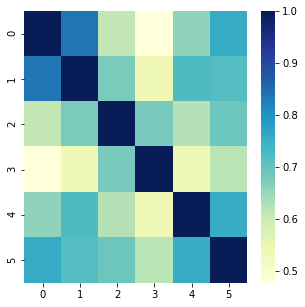

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5)) 
ax_blue = sns.heatmap(pairwise_similarities_5, cmap="YlGnBu")

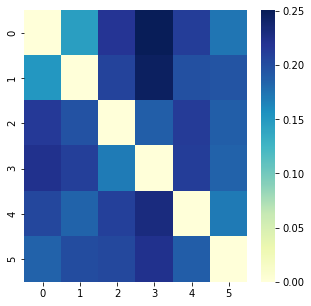

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5)) 
ax_blue = sns.heatmap(normed_matrix_5, cmap="YlGnBu")

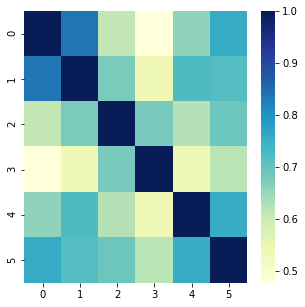

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5)) 
ax_blue = sns.heatmap(pairwise_similarities, cmap="YlGnBu")

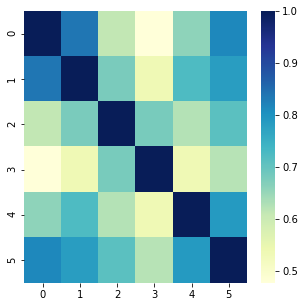

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5)) 
ax_blue = sns.heatmap(pairwise_similarities, cmap="YlGnBu")

In [ ]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: Machine learning is the study of computer algorithms that improve automatically through experience.Machine learning algorithms build a mathematical model based on sample data, known as training data.The discipline of machine learning employs various approaches to teach computers to accomplish tasks where no fully satisfactory algorithm is available.


Similar Documents using Cosine Similarity:


Document: Machine learning is closely related to computational statistics, which focuses on making predictions using computers.The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Cosine Similarity : 0.8365411162376404


Document: A software engineer creates programs based on logic for the computer to execute. A software engineer has to be more concernedabout the correctness of the program in all the cases. Meanwhile, a data scientist is comfortable with uncertainty and variability.
Cosine Similarity : 0.758043169975

In [ ]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Document: Machine learning is the study of computer algorithms that improve automatically through experience.Machine learning algorithms build a mathematical model based on sample data, known as training data.The discipline of machine learning employs various approaches to teach computers to accomplish tasks where no fully satisfactory algorithm is available.


Similar Documents using Euclidean Distance:


Document: Machine learning is closely related to computational statistics, which focuses on making predictions using computers.The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Euclidean Distance : 9.360411643981934


Document: A software engineer creates programs based on logic for the computer to execute. A software engineer has to be more concernedabout the correctness of the program in all the cases. Meanwhile, a data scientist is comfortable with uncertainty and variability.
Euclidean Distance : 11.147295951

### Procedia Paper

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

In [ ]:
def findNouns(str):
  is_noun = lambda pos: pos[:2] == 'NN'
  # do the nlp stuff
  tokenized = nltk.word_tokenize(str)
  nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
  return nouns 

def sharedWords(list1,list2):
  list1s = set(list1)
  shared = list1s.intersection(list2)
  return shared 

def findsharedAmount(nt,C):
  m=0
  for i in nt:
    if i in C:
      m+= len(i)
      print(i)
  return m

def defthreshold(C):
  m=0
  for i in C:
    m+=len(i)
  return m

def generateflags(Ft,nt,C):
  for i in range(len(nt)):
    if nt[i] in C:
      Ft[i]=True
  return Ft

def findIsolatedFalse(nt,Ft):
  for i in range(len(Ft)-2):
    x=Ft[i:i+3]
    if x[1]==False and x[0] ==True and x[2]==True:
      x[1]=True
      Ft[i:i+3] = x
      nt[i+1]='#'
  
  return nt,Ft

def remove_isolatedtrue(nr,Fr,M):
  x=0
  pp = 0
  i = 0
  while(i<len(Fr)):
    if Fr[i]==True:
      x=0
      x = x+len(nr[i])
      for j in range(i+1,len(Fr)):
        if Fr[j]==True:
          #print(j)
          x = x+ len(nr[j])
          pp = j
        else:
          break
      
      if (pp==len(Fr)-1):
        break
      if (x<M):
        #print(i, pp)
        for k in range(i,pp+1):
          Fr[k]=False
        i = pp
    i = i+1

  return Fr, nr

def compress(nr,Fr,M):
  nrc = []
  i = 0

  while(i< len(Fr)):
    if (Fr[i]==False and i==0):
      for j in range(i+1, len(Fr)):
        if(Fr[j]==False):
          i = j
    elif (Fr[i]==True):
      nrc.append(nr[i])
    elif (Fr[i]==False):
      for j in range(i+1, len(Fr)):
        if(Fr[j]==False):
          i = j
      nrc.append(" ")
    i = i+1
  
  return nrc

def shift_compare(a, b, M):
  plset = []
  for size in range(0,len(a)+1):
    #print(size)
    i = len(a) - size 
    j = 0
    final = np.ones(size) * -1

    while(i<len(a) and j < size and j < len(b)):
      #print(a[i], b[j], a[i]=='#' or b[j]=='#')
      if(a[i]=='#' and b[j]=='#'):
        final[j]= 0
      elif (a[i]=='#'):
        final[j] = len(b[j])
      elif (b[j] =='#'):
        final[j] = len(a[i])
      elif (a[i]==b[j]):
        final[j] = len(a[i])
      
      j = j+1
      i = i+1
    
    i = 0
    while(i<len(final)):
      t = 0
      start = -1
      stop = -1
      if(final[i]>=0):
        start = i
        stop = i
        t = t + final[i]

        for j in range(i+1, len(final)):
          if(final[j]>=0):
            t = t + final[j]
            stop = j
          else:
            i = j
            break
      if(t>M):
        #print("got one")
        plset.append([a[start:stop],t])
      
      i = i+1


  return plset

In [ ]:
def similarity(target,references):
  nt = findNouns(target)
  nr = findNouns(references)
  print(nt,nr)
  sharedC = sharedWords(nt,nr)
  print(sharedC)
  mt = findsharedAmount(nt,sharedC) 
  mr = findsharedAmount(nr,sharedC)
  print(mt,mr)
  threshold = defthreshold(sharedC)
  print(defthreshold(sharedC))
  check= mt>=threshold or mr >=threshold
  print(check)

  Ft = [False]*len(nt)
  Fr = [False]*len(nr)

  Ft = generateflags(Ft,nt,sharedC)
  Fr = generateflags(Fr,nr,sharedC)

  nt,Ft = findIsolatedFalse(nt,Ft)
  nr,Fr = findIsolatedFalse(nr,Fr)

  Fr1,nr1 = remove_isolatedtrue(nr.copy(),Fr.copy(),threshold)
  Ft1,nt1 = remove_isolatedtrue(nt.copy(),Ft.copy(),threshold)

  nrc = compress(nr1,Fr1,threshold)
  ntc = compress(nt1,Ft1,threshold)

  copy = shift_compare(nrc, ntc, threshold)
  print(copy)
  csets = set()
  for i in range(0, len(copy)):
    csets = csets.union(set(copy[i][0]))


  absent = set(ntc).difference(csets)

  l0 = 0 
  l = 0

  for i in ntc:
    l = l + len(i)

  for i in absent:
    l0 = l0 + len(i)

  try:
    print("Plagiarism percentage = {}".format((l-l0)/l))
  except:
    print("Plagiarism percentage = {}".format(1-1))

In [147]:
similarity(documents_df['documents_cleaned'])

[[1.   0.85 0.7  0.5  0.5  0.3 ]
 [0.85 1.   0.7  0.6  0.45 0.4 ]
 [0.7  0.7  1.   0.6  0.5  0.4 ]
 [0.5  0.6  0.6  1.   0.54 0.45]
 [0.5  0.45 0.5  0.54 1.   0.8 ]
 [0.3  0.4  0.4  0.45 0.8  1.  ]]


(36,)


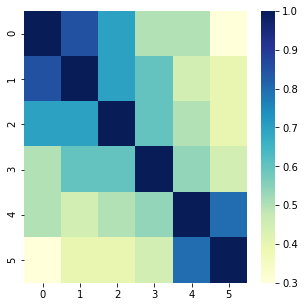

In [148]:
from array import *
#x = np.array([[1,0.85,0.7,0.5,0.65,0.4],[0,85,1,0.7,0.4,0.55,0.45],[0.7,0.7,1,0.6,0.5],[0.65,0.55,0.6,1,0.8],[0.4,0.45,0.5,0.8,1]])
x = np.array([1,0.85,0.7,0.5,0.5,0.3,
              0.85,1,0.7,0.6,0.45,0.4,
              0.7,0.7,1,0.6,0.5,0.4,
              0.5,0.6,0.6,1,0.54,0.45,
              0.5,0.45,0.5,0.54,1,0.8,
              0.3,0.4,0.4,0.45,0.8,1])
print(x.shape)
x = x.reshape(6,6)
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5)) 
ax_blue = sns.heatmap(x, cmap="YlGnBu")